In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student_performance.csv to student_performance.csv


In [ ]:
# prompt: import dataset from google colab


In [ ]:
df = pd.read_csv('student_performance.csv')
df.head(5)

,Age,Gender,family_income,parent_education_level,School,Level,100_level_cgpa,current_cgpa,MATH 101,MATH 102,...,Do you have health issues that affect your studies,Education motivation level,study_hours,study_preference,Internet_access,time_management_skills,Peer influence on student perfromance,course_material,Hall_distance,Extracurricular activity
0,17.8,NaN,NaN,NaN,NaN,NaN,5.0,NaN,B,C,...,NaN,NaN,20,Self-study,NaN,NaN,3,2.0,1 km - 2km,Yes
1,17.0,Female,"Greater than 70,000,000 per annum",Postgraduate,Computing,400.0,4.5,4.0,B,A,...,No,High,< 40 hours,Self-study,Yes,Average,10,3.0,1 km,Yes
2,18.0,Male,"30,000,000-50,000,000 naira per annum",Bachelor's,Computing,300.0,5.0,5.0,A,A,...,No,High,< 40 hours,Self-study,Yes,Average,1,5.0,Less than 1 km,No
3,18.0,Male,"< 30,000,000 naira/yesr",Postgraduate,Computing,200.0,4.0,4.0,B,A,...,No,Medium,< 40 hours,Self-study,Yes,Average,8,4.0,Less than 1 km,Yes
4,17.0,Male,"30,000,000-50,000,000 naira per annum",Postgraduate,Computing,200.0,4.5,4.5,A,A,...,No,Medium,< 40 hours,Self-study,Yes,Poor,10,4.0,1 km,Yes


In [ ]:
df.columns= df.columns.str.strip()
df.columns

Index(['Age', 'Gender', 'family_income', 'parent_education_level', 'School',
       'Level', '100_level_cgpa', 'current_cgpa', 'MATH_101', 'MATH_102',
       'COSC_111', 'PHY101', 'PHY102', 'classAttendance', 'Assignment_score',
       'Assignment_performance', 'class_participation',
       'Rate_your_attendance_to_classes', 'Rate_your_overall_performance.',
       'Do_you_have_health_issues_that_affect_your_studies',
       'Education_motivation_level', 'study_hours', 'study_preference',
       'Internet_access', 'time_management_skills',
       'Peer_influence_on_student_perfromance', 'course_material',
       'Hall_distance', 'Extracurricular_activity'],
      dtype='object')

In [ ]:
df['study_hours'].unique()

array([30, 50,  3, 20, 10, 60])

In [ ]:
df['study_hours'] = df['study_hours'].replace({
    '< 40 hours': 30,  # You can change this to 40 if preferred
    'I dont actually know': 20
})

# Convert numeric-looking strings to integers
df['study_hours'] = pd.to_numeric(df['study_hours'], errors='coerce')
empty = 10
df['study_hours'] = df['study_hours'].fillna(empty).astype(int)  # Fill NaN with 0 and convert to int
df['study_hours'].unique()

array([30, 50,  3, 20, 10, 60])

In [ ]:
df['study_hours'].unique()

array([30, 50,  3, 20, 10, 60])

In [ ]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Age', 'Gender', 'family_income', 'parent_education_level', 'School',
       'Level', '100_level_cgpa', 'current_cgpa', 'MATH_101', 'MATH_102',
       'COSC_111', 'PHY101', 'PHY102', 'classAttendance', 'Assignment_score',
       'Assignment_performance', 'class_participation',
       'Rate_your_attendance_to_classes', 'Rate_your_overall_performance.',
       'Do_you_have_health_issues_that_affect_your_studies',
       'Education_motivation_level', 'study_hours', 'study_preference',
       'Internet_access', 'time_management_skills',
       'Peer_influence_on_student_perfromance', 'course_material',
       'Hall_distance', 'Extracurricular_activity'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace("__","_")
df.columns

Index(['Age', 'Gender', 'family_income', 'parent_education_level', 'School',
       'Level', '100_level_cgpa', 'current_cgpa', 'MATH_101', 'MATH_102',
       'COSC_111', 'PHY101', 'PHY102', 'classAttendance', 'Assignment_score',
       'Assignment_performance', 'class_participation',
       'Rate_your_attendance_to_classes', 'Rate_your_overall_performance.',
       'Do_you_have_health_issues_that_affect_your_studies',
       'Education_motivation_level', 'study_hours', 'study_preference',
       'Internet_access', 'time_management_skills',
       'Peer_influence_on_student_perfromance', 'course_material',
       'Hall_distance', 'Extracurricular_activity'],
      dtype='object')

In [ ]:
df = df.drop(index=0).reset_index(drop=True)
df

,Age,Gender,family_income,parent_education_level,School,Level,100_level_cgpa,current_cgpa,MATH_101,MATH_102,...,Do_you_have_health_issues_that_affect_your_studies,Education_motivation_level,study_hours,study_preference,Internet_access,time_management_skills,Peer_influence_on_student_perfromance,course_material,Hall_distance,Extracurricular_activity
0,18,Male,"30,000,000-50,000,000 naira per annum",Bachelor's,Computing,300.0,5.0,5.0,A,A,...,No,High,30,Self-study,Yes,Average,1,5.0,Less than 1 km,No
1,18,Male,"< 30,000,000 naira/year",Postgraduate,Computing,200.0,4.0,4.0,B,A,...,No,Medium,30,Self-study,Yes,Average,8,4.0,Less than 1 km,Yes
2,17,Male,"30,000,000-50,000,000 naira per annum",Postgraduate,Computing,200.0,4.5,4.5,A,A,...,No,Medium,30,Self-study,Yes,Poor,10,4.0,1 km,Yes
3,19,Male,"< 30,000,000 naira/year",Bachelor's,Computing,300.0,4.0,4.0,B,A,...,No,Medium,30,Self-study,Yes,Average,6,4.0,2 km,Yes
4,17,Female,"Greater than 70,000,000 per annum",Postgraduate,Public Health,200.0,4.5,4.5,B,B,...,No,Medium,50,Self-study,Yes,Average,8,5.0,2 km,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,21,Female,"< 30,000,000 naira/year",Bachelor's,Computing,400.0,2.6,3.1,A,B,...,Yes,High,30,Self-study,Yes,Average,2,2.0,10km,Yes
98,20,Female,"< 30,000,000 naira/year",Bachelor's,Public Health,500.0,2.3,2.2,B,C,...,Yes,Medium,20,Self-study,No,Average,3,3.0,Less than 1 km,Yes
99,22,Female,"50,000,000-70,000,000 naira per annum",Postgraduate,Other,500.0,2.0,2.4,C,B,...,No,Low,10,Self-study,No,Average,4,4.0,1 km,Yes
100,19,Female,"30,000,000-50,000,000 naira per annum",Bachelor's,Computing,300.0,2.5,2.3,A,A,...,No,Medium,20,Self-study,Yes,Poor,5,5.0,1 km,Yes


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
family_income,0
parent_education_level,0
School,0
Level,0
100_level_cgpa,0
current_cgpa,0
MATH_101,0
MATH_102,0


In [ ]:
df['Age'] =  df['Age'].astype(int)
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102 entries, 0 to 101
Series name: Age
Non-Null Count  Dtype
--------------  -----
102 non-null    int64
dtypes: int64(1)
memory usage: 948.0 bytes


In [ ]:
missing_counts = df.isnull().sum()  # Count missing values per column
missing_counts = missing_counts[missing_counts > 0]  # Show only columns with missing values

# Display missing values count
missing_counts

,0


#### REPLACE MISSING VALUES

In [ ]:
df['family_income']=df['family_income'].str.replace('yesr','year')

df['family_income'].fillna('undisclose', inplace=True)
df['family_income'].isnull().sum()

<ipython-input-66-f010bd7d2688>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['family_income'].fillna('undisclose', inplace=True)


0

In [ ]:
df['parent_education_level'].fillna('Other', inplace=True)
df['parent_education_level'].isnull().sum()

<ipython-input-68-29dc5c381dfb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parent_education_level'].fillna('Other', inplace=True)


0

In [ ]:
missing_counts = df.isnull().sum()  # Count missing values per column
missing_counts = missing_counts[missing_counts > 0]  # Show only columns with missing values

# Display missing values count
missing_counts

,0


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
family_income,0
parent_education_level,0
School,0
Level,0
100_level_cgpa,0
current_cgpa,0
MATH_101,0
MATH_102,0


In [ ]:
df['School'].fillna('Other',inplace=True)
df['Extracurricular_activity'].fillna('Yes', inplace=True)
df['School'].isnull().sum()

<ipython-input-72-0ef1477b6fdb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['School'].fillna('Other',inplace=True)
<ipython-input-72-0ef1477b6fdb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

0

In [ ]:
df['Extracurricular_activity'].value_counts()

,count
Extracurricular_activity,
Yes,63
No,39


In [ ]:
df['Hall_distance'].unique()
df['Hall_distance'].fillna('< 10km', inplace=True)
df.study_hours.fillna('< 40 hours',inplace=True)
courseMatAvg  = round(df.course_material.mean())
df.course_material.fillna(courseMatAvg, inplace=True)
df.Level.fillna(300, inplace=True)
AssPerMean = df.Assignment_performance.mean()
df['Assignment_performance'].fillna(AssPerMean, inplace=True)
C_P = round(df.class_participation.mean())
df.class_participation.fillna(C_P, inplace=True)
df.Education_motivation_level.fillna('Medium', inplace=True)
df.Extracurricular_activity.fillna('Yes', inplace=True)
df.isnull().sum()

<ipython-input-75-d89b2bd8f7f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hall_distance'].fillna('< 10km', inplace=True)
<ipython-input-75-d89b2bd8f7f3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Age,0
Gender,0
family_income,0
parent_education_level,0
School,0
Level,0
100_level_cgpa,0
current_cgpa,0
MATH_101,0
MATH_102,0


#### EXPLORATION DATA ANALYSIS AND VISUALIZATION

##### Total number of respondents

In [ ]:
totalRespondent = df.count()
totalRespondent.iloc[3]

102

#### Level Distribution

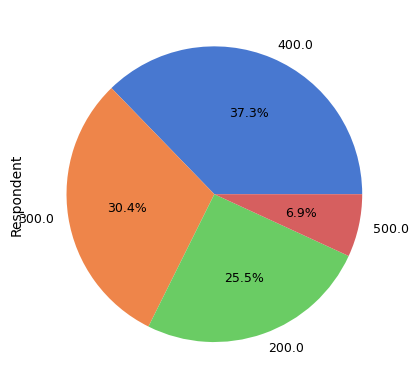

In [ ]:
df['Level'].astype(int)

df.Level.value_counts().plot(kind="pie", xlabel="Level", ylabel="Respondent",
                            autopct="%1.1f%%", fontsize=9)

plt.show()

### 📌 Summary of Correlation Heatmap
Strong Positive Correlations:

 - High class attendance leads to better assignment performance and higher CGPA.
 - Good assignment scores improve overall academic performance.

###### Moderate Positive Correlations:

Early academic success (100_level_cgpa) strongly predicts current CGPA.
Negative Correlations:

Older students tend to have lower CGPA.
Higher academic levels have lower 100-level CGPA.

📊 Key Takeaways:
 - Attendance and assignments are crucial for academic success.
 - Past performance is a strong predictor of future success.
 - Older students may need extra academic support.

In [ ]:
# # Countplot for Categorical Variables
# categorical_columns = ['Gender', 'School', 'parent_education_level', 'Internet_access']
# for col in categorical_columns:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=df[col], palette="coolwarm")
#     plt.title(f"Distribution of {col}")
#     plt.xticks(rotation=45)
#     plt.show()

# # Correlation Heatmap (for numerical features)
# plt.figure(figsize=(12, 6))


# plt.show()

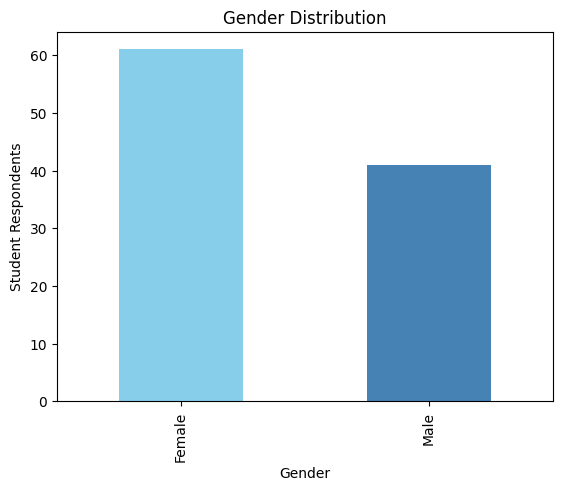

In [ ]:
plt.title("Gender Distribution")
sns.set_palette("muted")
df['Gender'].value_counts().plot(kind="bar", color=("skyblue", "#4682B4"), xlabel="Gender", ylabel="Student Respondents")
plt.show()

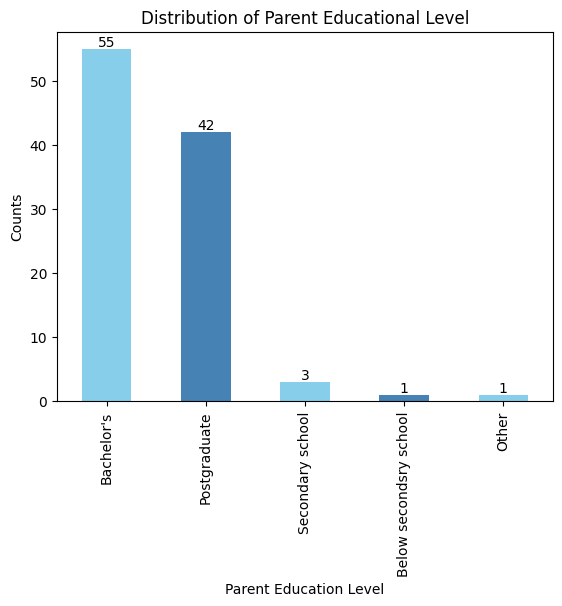

In [ ]:
plt.title("Distribution of Parent Educational Level")
sns.set_palette("muted")
ax = df['parent_education_level'].value_counts().plot(kind="bar",
                                                 color=("skyblue", "#4682B4"),
                                                 xlabel="Parent Education Level",
                                                 ylabel="Counts")
for i, v in enumerate(df['parent_education_level'].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

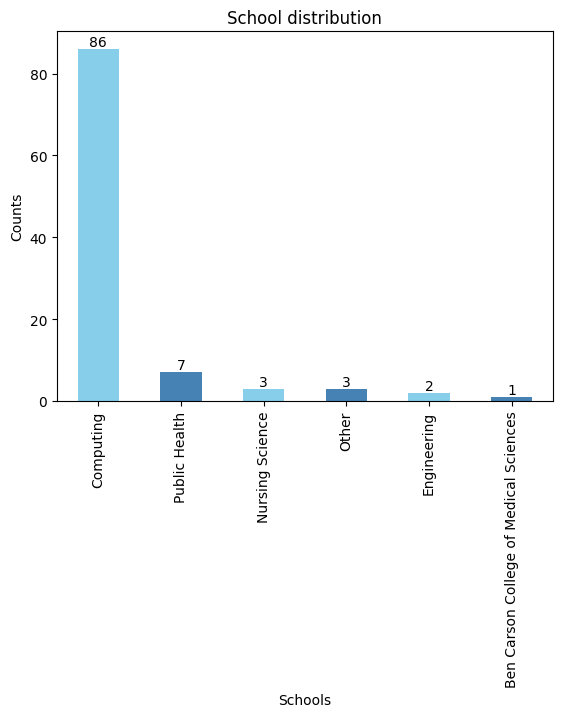

In [ ]:

plt.title("School distribution")
sns.set_palette("muted")
value_counts = df['School'].value_counts()
ax = value_counts.plot(kind="bar",color=("skyblue", "#4682B4"),
                       xlabel="Schools",
                       ylabel="Counts")
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

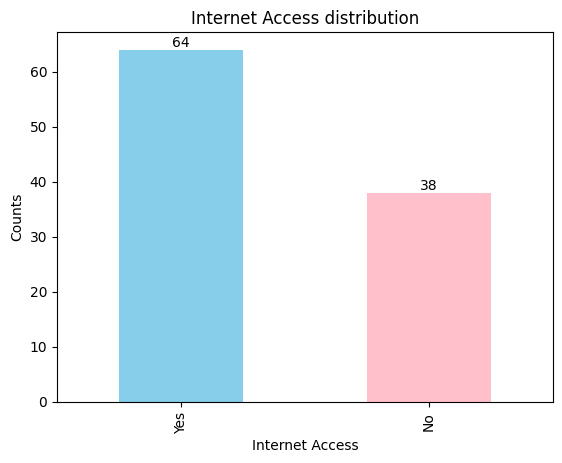

In [ ]:

plt.title("Internet Access distribution")
sns.set_palette("muted")
value_counts = df['Internet_access'].value_counts()
ax = value_counts.plot(kind="bar",color=("skyblue", "pink"),
                       xlabel="Internet Access",
                       ylabel="Counts")
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

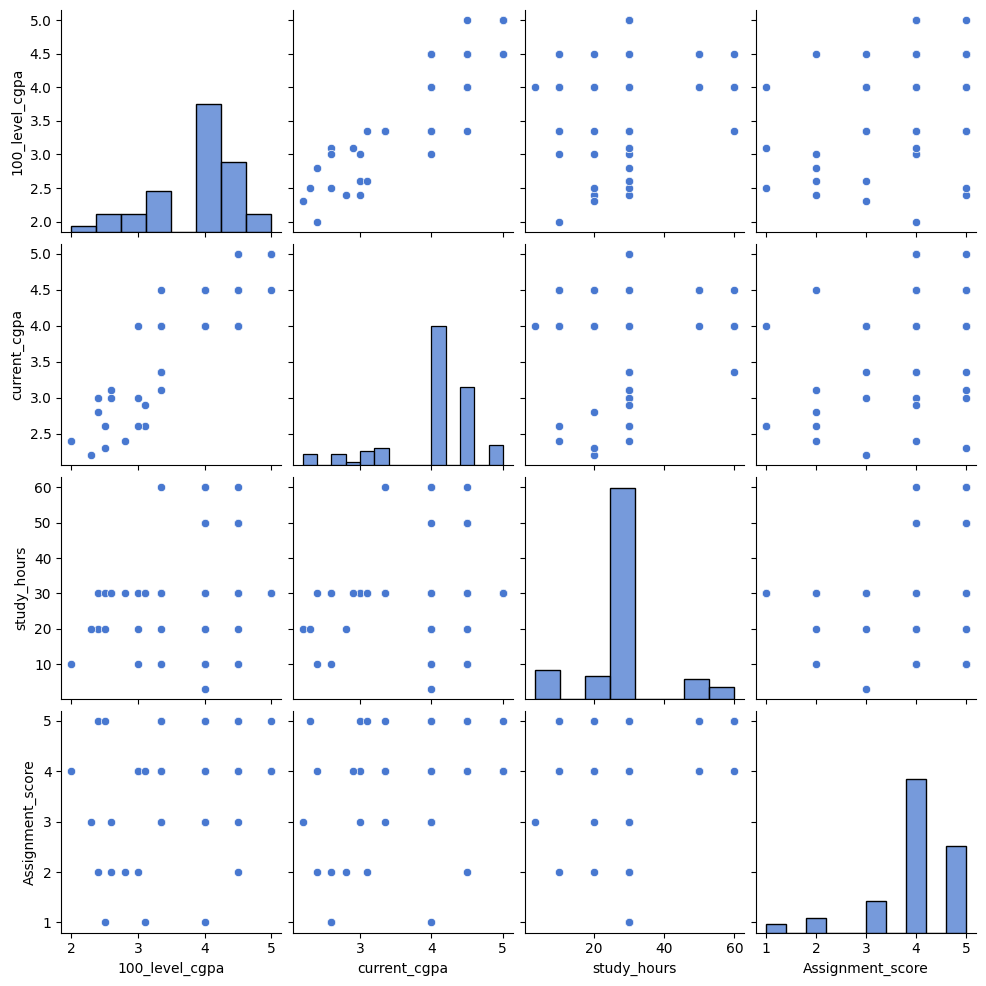

In [ ]:
selected_features = ['100_level_cgpa', 'current_cgpa', 'study_hours', 'Assignment_score']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
sns.pairplot(df[selected_features])

### TRANSFORMING DATA (DATA PREPROCESSING)

SPLITING DATASET INTO TARGET AND LABEL
 - First Approach: To Predict Perceived Performance
 - Second Approach: To Predict Actual Performance

###### FIRST APPROACH (Predicting Perceived Performance)
using target as 'rate_your_overall_performance'

In [ ]:
encoder =  LabelEncoder()
encoder

LabelEncoder()

In [ ]:
selected_features = [
    "current_cgpa", "100_level_cgpa", "Assignment_performance", "classAttendance",
    "study_hours", "Education_motivation_level", "class_participation",
    "Internet_access", "Peer_influence_on_student_perfromance", "time_management_skills"
]
label = df[selected_features]
target = df['Rate_your_overall_performance.']


In [ ]:
label_encoder_df = label.select_dtypes(include=['object']).columns
label_encoder = label.copy()
for col in label_encoder_df:
    label_encoder[col + '_encoder'] = encoder.fit_transform(label_encoder[col])

X = label_encoder.drop(columns=label, axis=1)
X.columns

Index(['Education_motivation_level_encoder', 'Internet_access_encoder',
       'time_management_skills_encoder'],
      dtype='object')

In [ ]:
encoder = LabelEncoder()

# Find categorical columns in the selected features
label_encoder_df = label.select_dtypes(include=['object']).columns

# Create a copy of the DataFrame to apply encoding
label_encoder = label.copy()

# Encode categorical columns and add new encoded columns
for col in label_encoder_df:
    label_encoder[col + '_encoder'] = encoder.fit_transform(label_encoder[col])

# Drop the original categorical columns after encoding
X = label_encoder.drop(columns=label_encoder_df)

# Display the feature columns after encoding
print("Final feature columns:")
print(X.columns)

# Check the shape of the final features and target
print("Feature set shape:", X.shape)

Final feature columns:
Index(['current_cgpa', '100_level_cgpa', 'Assignment_performance',
       'classAttendance', 'study_hours', 'class_participation',
       'Peer_influence_on_student_perfromance',
       'Education_motivation_level_encoder', 'Internet_access_encoder',
       'time_management_skills_encoder'],
      dtype='object')
Feature set shape: (102, 10)


In [ ]:
def clean_study_hours(value):
    try:
        # Convert numeric-looking strings to integers
        return int(value)
    except ValueError:
        # Keep non-numeric values as they are
        return value.strip().lower()  # Normalize strings like "Depends "

# Assuming 'df' is your DataFrame
# Clean the study_hours column
df['study_hours'] = df['study_hours'].apply(clean_study_hours)

# Define the selected features
selected_features = [
    "current_cgpa", "100_level_cgpa", "Assignment_performance", "classAttendance",
    "study_hours", "Education_motivation_level", "class_participation",
    "Internet_access", "Peer_influence_on_student_perfromance", "time_management_skills"
]

# Define features and target
label = df[selected_features]
target = df['Rate_your_overall_performance.']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Detect categorical columns (including cleaned study_hours)
label_encoder_df = label.select_dtypes(include=['object']).columns.tolist()
if 'study_hours' not in label_encoder_df:
    label_encoder_df.append('study_hours')  # Ensure study_hours is treated as categorical

# Create a copy of the DataFrame for encoding
label_encoder = label.copy()

# Encode categorical columns and save encoders
encoders = {}
for col in label_encoder_df:
    le = LabelEncoder()
    label_encoder[col + '_encoder'] = le.fit_transform(label_encoder[col].astype(str))
    encoders[col] = le  # Store the encoder for later use

In [ ]:
target_encoder = encoder.fit_transform(target)
y = target_encoder
y

array([0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1])

#### NORMALIZE STANDARD SCALER

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X =  pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X

,current_cgpa,100_level_cgpa,Assignment_performance,classAttendance,study_hours,class_participation,Peer_influence_on_student_perfromance,Education_motivation_level_encoder,Internet_access_encoder,time_management_skills_encoder
0,1.605484,1.679112,0.509627,0.417207,0.024906,0.987151,-1.606285,-1.394860,0.770552,-0.629188
1,0.021738,0.147185,0.088298,-0.417207,0.024906,-0.152729,0.936703,0.810965,0.770552,-0.629188
2,0.813611,0.913149,0.088298,-0.417207,0.024906,-1.672569,1.663270,0.810965,0.770552,1.990290
3,0.021738,0.147185,-0.333030,-0.417207,0.024906,-0.532689,0.210135,0.810965,0.770552,-0.629188
4,0.813611,0.913149,0.930955,0.834413,1.906686,1.367111,0.936703,0.810965,0.770552,-0.629188
...,...,...,...,...,...,...,...,...,...,...
97,-1.403634,-1.997513,-2.439672,-2.503240,0.024906,-1.672569,-1.243001,-1.394860,0.770552,-0.629188
98,-2.829005,-2.457091,-2.018344,-2.086034,-0.915984,-1.292609,-0.879717,0.810965,-1.297771,-0.629188
99,-2.512256,-2.916669,-1.597015,-1.668827,-1.856874,-0.912649,-0.516433,-0.291947,-1.297771,-0.629188
100,-2.670630,-2.150705,-1.175687,-1.251620,-0.915984,-0.532689,-0.153149,0.810965,0.770552,1.990290


In [ ]:
X = label_encoder.drop(columns=label_encoder_df)
y = target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(81, 10) (21, 10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.90


**CROSS VALIDATION FOR RANDOM FOREST**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.76190476 0.85714286 0.8        0.95       0.55      ]
Mean Accuracy: 0.78


**USING SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate performance
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {svm_accuracy:.2f}")

Model Accuracy: 0.67


**CROSS VALIDATION FOR SUPPORT VECTOR**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm, X, y, cv=2, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
mean_accuracy = cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Cross-Validation Scores: [0.76470588 0.58823529]
Mean Accuracy: 0.68


**USING LOGISTIC REGRESSION**

In [ ]:
# USING LOGISTIC REGRESSION


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
re = LogisticRegression(max_iter=1000)  # Increased iterations to ensure convergence

# Train the model
re.fit(X_train, y_train)

# Make predictions
y_pred = re.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.92      0.88        12
         Low       0.67      1.00      0.80         2
      Medium       0.80      0.57      0.67         7

    accuracy                           0.81        21
   macro avg       0.77      0.83      0.78        21
weighted avg       0.81      0.81      0.80        21



**USING GRADIENT BOOSTING CLASSIFIER**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)

#make prediction
y_pred = gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.86


**RANDOM FOREST TEST PREDICTION MODEL**

In [ ]:
# ----------------- PREDICTING NEW DATA ----------------- #

# Example input data for prediction (with cleaned study_hours)
new_data = pd.DataFrame({
    "current_cgpa": [2.3],
    "100_level_cgpa": [3.3],
    "Assignment_performance": [5],
    "classAttendance": [5],
    "study_hours": [3],  # Treated as categorical
    "Education_motivation_level": ["High"],
    "class_participation": [10],
    "Internet_access": ["No"],
    "Peer_influence_on_student_perfromance": [3],
    "time_management_skills": ["Average"]
})



new_data['Education_motivation_level'] = new_data['Education_motivation_level'].str.capitalize()
# Encode new data using saved encoders
for col in label_encoder_df:
    if col in new_data.columns:
        new_data[col + '_encoder'] = encoders[col].transform(new_data[col].astype(str))

# Drop the original categorical columns
new_data_processed = new_data.drop(columns=label_encoder_df)

# Make prediction
prediction = clf.predict(new_data_processed)

# Output the predicted performance rating
print(f"Predicted Overall Performance Rating: {prediction[0]}")




**GGBOOST TEST PREDICTION MODEL**

In [ ]:
# ----------------- PREDICTING NEW DATA ----------------- #

# Example input data for prediction (with cleaned study_hours)
new_data = pd.DataFrame({
    "current_cgpa": [2.3],
    "100_level_cgpa": [3.3],
    "Assignment_performance": [5],
    "classAttendance": [5],
    "study_hours": [3],  # Treated as categorical
    "Education_motivation_level": ["High"],
    "class_participation": [10],
    "Internet_access": ["No"],
    "Peer_influence_on_student_perfromance": [3],
    "time_management_skills": ["Average"]
})



new_data['Education_motivation_level'] = new_data['Education_motivation_level'].str.capitalize()
# Encode new data using saved encoders
for col in label_encoder_df:
    if col in new_data.columns:
        new_data[col + '_encoder'] = encoders[col].transform(new_data[col].astype(str))

# Drop the original categorical columns
new_data_processed = new_data.drop(columns=label_encoder_df)

# Make prediction
prediction = gb.predict(new_data_processed)

# Output the predicted performance rating
print(f"Predicted Overall Performance Rating: {prediction[0]}")




Predicted Overall Performance Rating: Low


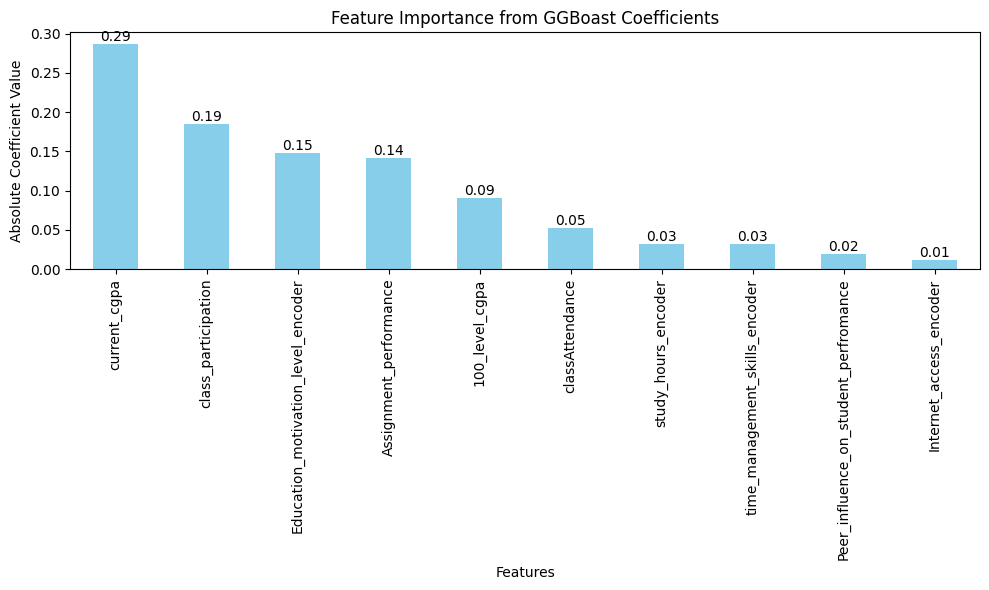

In [ ]:
feature_importances = pd.Series(gb.feature_importances_, index=X_train.columns)

# Sort feature importances
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
x = sorted_importances.plot(kind='bar', color='skyblue')
for i, v in enumerate(sorted_importances):
    x.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.title('Feature Importance from GGBoast Coefficients')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

**CHECK FEATURES IMPORTANCES SCORE OF OUR MODEL**

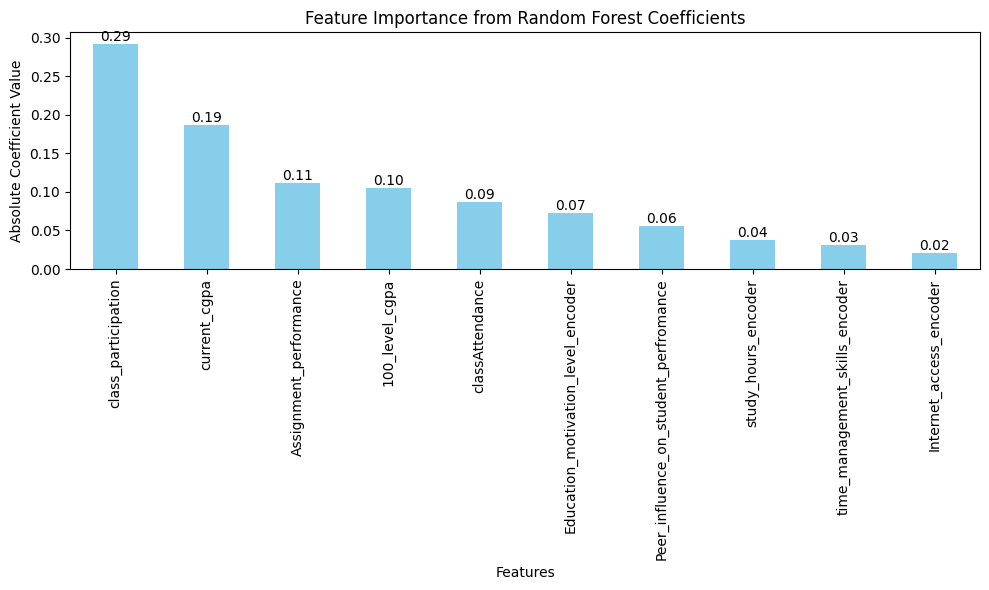

In [ ]:
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

# Sort feature importances
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
x = sorted_importances.plot(kind='bar', color='skyblue')
for i, v in enumerate(sorted_importances):
    x.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.title('Feature Importance from Random Forest Coefficients')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

**TEST PREDICTION USING LOGISTIC REGRESSION**

In [ ]:
# ----------------- PREDICTING NEW DATA ----------------- #

# Example input data for prediction (with cleaned study_hours)
new_data = pd.DataFrame({
    "current_cgpa": [3],
    "100_level_cgpa": [3],
    "Assignment_performance": [10],
    "classAttendance": [10],
    "study_hours": [3],  # Treated as categorical
    "Education_motivation_level": ["High"],
    "class_participation": [5],
    "Internet_access": ["No"],
    "Peer_influence_on_student_perfromance": [3],
    "time_management_skills": ["Good"]
})



new_data['Education_motivation_level'] = new_data['Education_motivation_level'].str.capitalize()
# Encode new data using saved encoders
for col in label_encoder_df:
    if col in new_data.columns:
        new_data[col + '_encoder'] = encoders[col].transform(new_data[col].astype(str))

# Drop the original categorical columns
new_data_processed = new_data.drop(columns=label_encoder_df)

# Make prediction
prediction = re.predict(new_data_processed)

# Output the predicted performance rating
print(f"Predicted Overall Performance Rating: {prediction[0]}")

Predicted Overall Performance Rating: Medium


**CHECK FEATURES IMPORTANCES SCORE OF OUR MODEL**

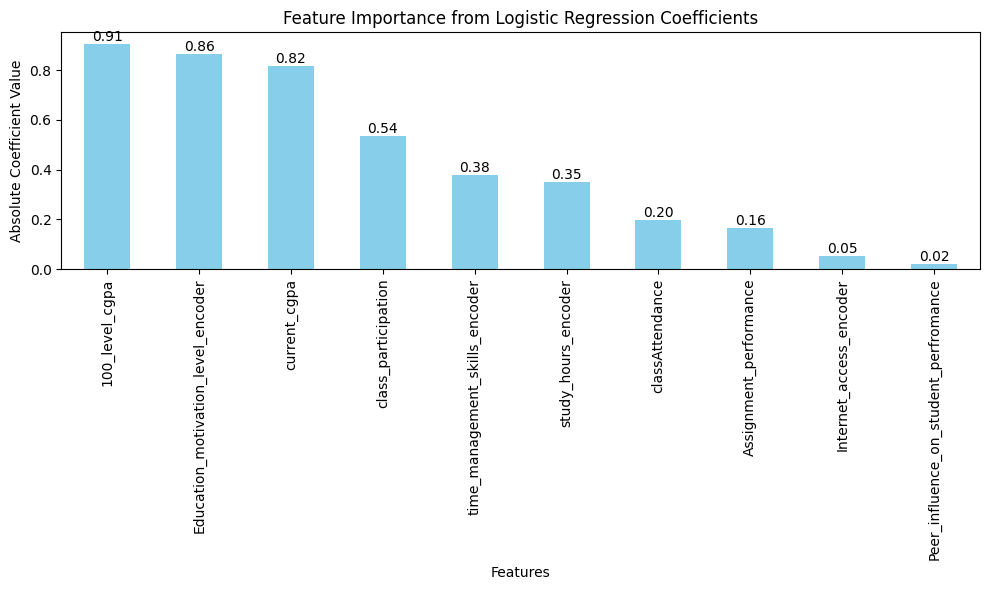

In [ ]:
feature_importances = pd.Series(re.coef_[0], index=X_train.columns)

# Sort feature importances
sorted_importances = feature_importances.abs().sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
x = sorted_importances.plot(kind='bar', color='skyblue')
for i, v in enumerate(sorted_importances):
    x.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [ ]:
# 📦 Import necessary libraries


# 🗂️ Define the selected features and target variable
selected_features = [
    "100_level_cgpa", "Assignment_performance", "classAttendance",
    "study_hours", "Education_motivation_level", "class_participation",
    "Internet_access", "Peer_influence_on_student_perfromance", "time_management_skills"
]

# 🎯 Set up features (X) and target (y)
X = df[selected_features]
y = df['current_cgpa']

# 🎭 Encode categorical features using individual encoders for each column
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le  # Save encoder for later use

# 🏋️‍♂️ Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<ipython-input-126-5f71bb7c6b20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
<ipython-input-126-5f71bb7c6b20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
<ipython-input-126-5f71bb7c6b20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

**RANDOM FOREST FOR PREDICTING CURRENT GRADE POINT**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pickle  # For saving the model

# 🌳 Train a Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🎯 Make predictions on the test set
y_pred = rf.predict(X_test)

# 📊 Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 🔮 Predict for new data
new_data = pd.DataFrame({
    "100_level_cgpa": [2.0],
    "Assignment_performance": [5],
    "classAttendance": [1],
    "study_hours": [1],
    "Education_motivation_level": ["Low"],
    "class_participation": [5],
    "Internet_access": ["Yes"],
    "Peer_influence_on_student_perfromance": [6],
    "time_management_skills": ["bad"]
})

# Properly encode new data using the same encoders
for col in categorical_columns:
    if col in new_data.columns:
        if new_data[col].iloc[0] in encoders[col].classes_:
            new_data[col] = encoders[col].transform(new_data[col].astype(str))
        else:
            # Handle unseen labels gracefully by assigning the most frequent label or a placeholder
            most_frequent_label = encoders[col].classes_[0]
            new_data[col] = encoders[col].transform([most_frequent_label])

# Make prediction on new data
predicted_cgpa = rf.predict(new_data)
print(f"Predicted Current CGPA: {predicted_cgpa[0]:.2f}")

# 💾 Save the model and encoders
with open('random_forest_cgpa_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(encoders, encoder_file)

print("Model and encoders saved successfully!")


Mean Squared Error: 0.07
R^2 Score: 0.87
Predicted Current CGPA: 2.55
Model and encoders saved successfully!


**GGBOOST FOR PREDICTING CURRENT GRADE POINT**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🌳 Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# 🎯 Make predictions on the test set using Gradient Boosting Regressor
y_pred = gbr.predict(X_test)

# 📊 Evaluate the model for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 🔮 Predict for new data
new_data = pd.DataFrame({
    "100_level_cgpa": [2.7],
    "Assignment_performance": [7],
    "classAttendance": [8],
    "study_hours": [40],
    "Education_motivation_level": ["High"],
    "class_participation": [9],
    "Internet_access": ["Yes"],
    "Peer_influence_on_student_perfromance": [6],
    "time_management_skills": ["Good"]
})

# Encode categorical columns using the previous encoder
# Properly encode new data using the same encoders
for col in categorical_columns:
    if col in new_data.columns:
        if new_data[col].iloc[0] in encoders[col].classes_:
            new_data[col] = encoders[col].transform(new_data[col].astype(str))
        else:
            # Handle unseen labels gracefully by assigning the most frequent label or a placeholder
            most_frequent_label = encoders[col].classes_[0]
            new_data[col] = encoders[col].transform([most_frequent_label])

# Make prediction on new data
predicted_cgpa = rf.predict(new_data)
print(f"Predicted Current CGPA: {predicted_cgpa[0]:.2f}")


Mean Squared Error: 0.10
R^2 Score: 0.80
Predicted Current CGPA: 3.17


In [ ]:
# ----------------- SAVE THE MODEL ----------------- #
import pickle
# Save the trained model and encoders
with open('student_performance_model.pkl', 'wb') as model_file:
    pickle.dump(re, model_file)

with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(encoders, encoder_file)

print("Model and encoders saved successfully!")

Model and encoders saved successfully!


**USING Artificial Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(16, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='linear')  # Output Layer (Use 'softmax' for classification)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Use 'categorical_crossentropy' for classification

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth':[3,5,7]
}
gb =  GradientBoostingClassifier()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weight=None)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 1512, in _encode_y
    check_classification_targets(y)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
